In [33]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import seaborn as sns
import seaborn as sns



In [34]:
titanic = pd.read_csv("C:/Users/udyay/Downloads/titanic - titanic.csv")

In [35]:
titanic.head()
titanic.columns
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
#check categorical data
titanic.groupby(by=["deck"]).count()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


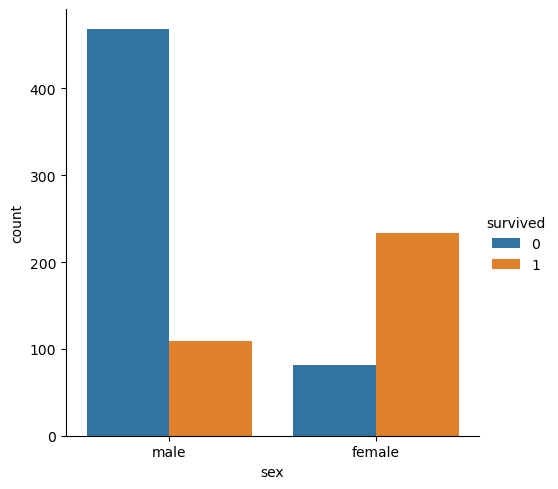

In [37]:
# Countplot
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = titanic)

In [38]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()


<Axes: xlabel='survived', ylabel='pclass'>

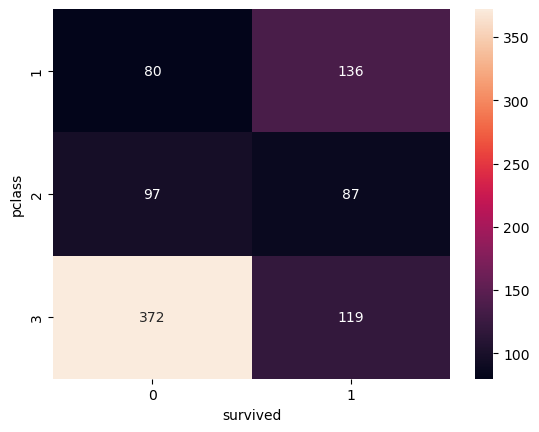

In [39]:
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

C:\Users\udyay\AppData\Local\Temp\ipykernel_2884\3531073272.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


NameError: name 'plt' is not defined

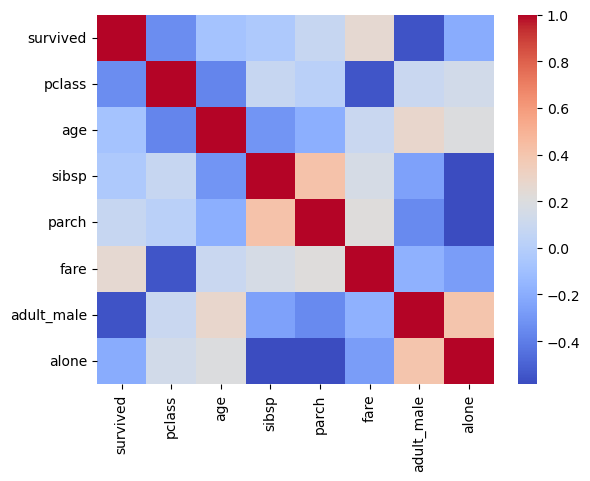

In [40]:

# for heat maps, indexing / correaltions needs to be established
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')


<Axes: xlabel='sex', ylabel='age'>

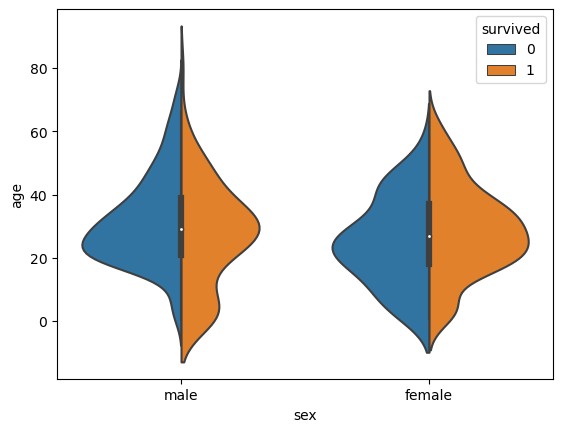

In [41]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = titanic, split = True)

In [56]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['parch']+titanic['sibsp']
print(titanic)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [60]:
# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

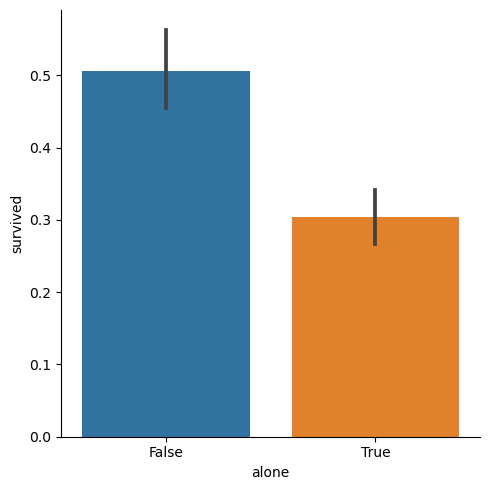

In [49]:

import seaborn as sns

# Example code using catplot
titanic = sns.load_dataset('titanic')
sns.catplot(x='alone', y='survived', data=titanic, kind='bar')



In [54]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['fare'], 4)
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone       Fare_Range  
0    man        True  NaN  Southampton    no  False   (-0.001, 7.91]  
1  woman       False    C    Cherbourg   yes  False  (31.0, 512.329]  
2  woman       False  NaN  Southampton   yes   True   (7.91, 14.454]  
3  woman       False    C  Southampton   yes  False  (31.0, 512.329]  
4    man        True  NaN  Southampton    no   True   (7.91, 14.454]  


<Axes: xlabel='Fare_Range', ylabel='survived'>

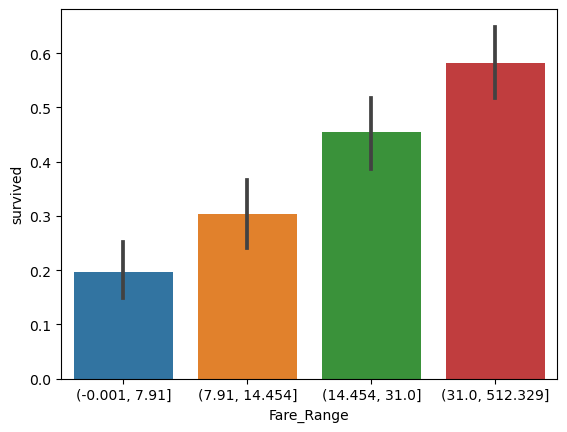

In [64]:
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='survived',
data = titanic)


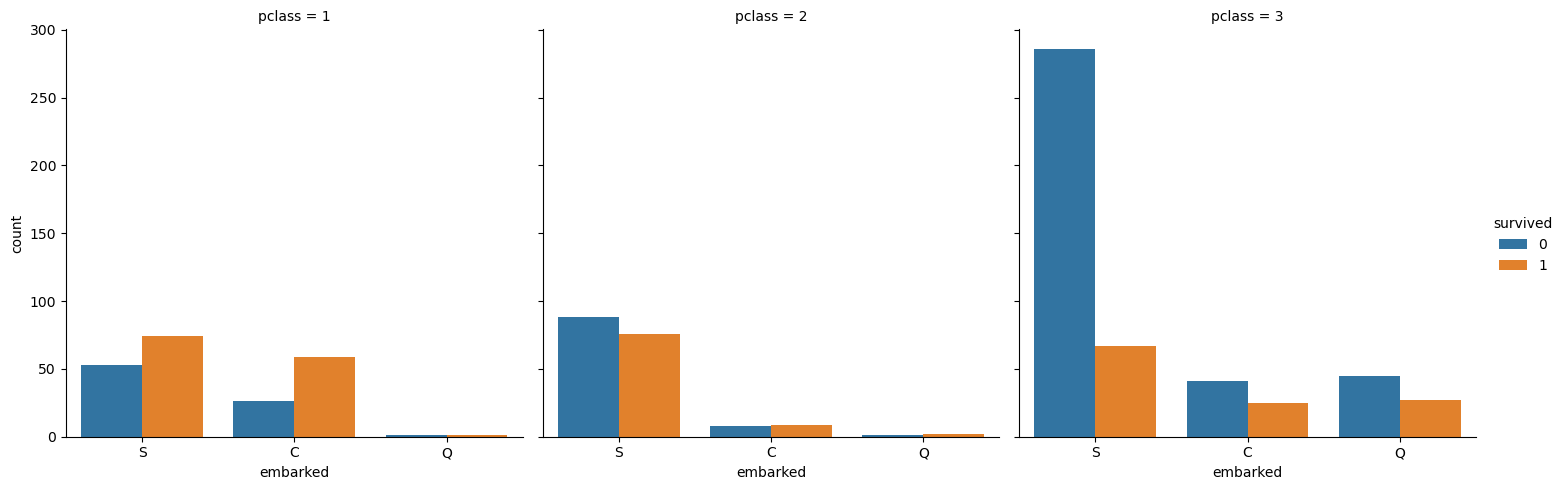

In [65]:
# Countplot
sns.catplot(x ='embarked', hue ='survived',
kind ='count', col ='pclass', data = titanic)

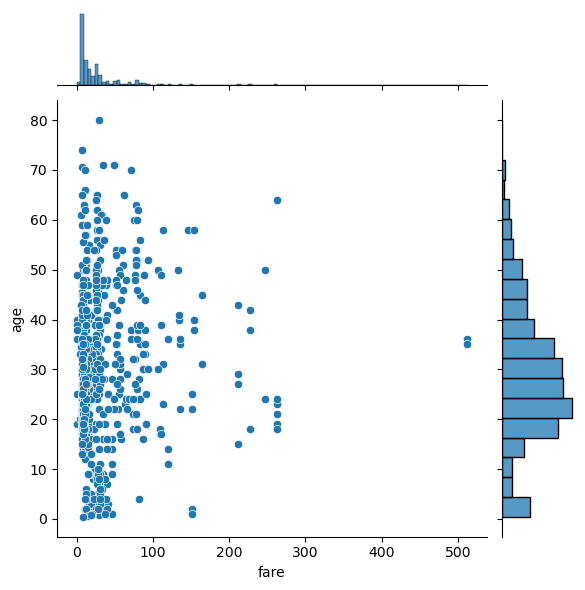

In [67]:
#Joint Plot
sns.jointplot(x='fare',y='age',data=titanic)

C:\Users\udyay\AppData\Local\Temp\ipykernel_2884\1582134570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["fare"],kde=False)


<Axes: xlabel='fare'>

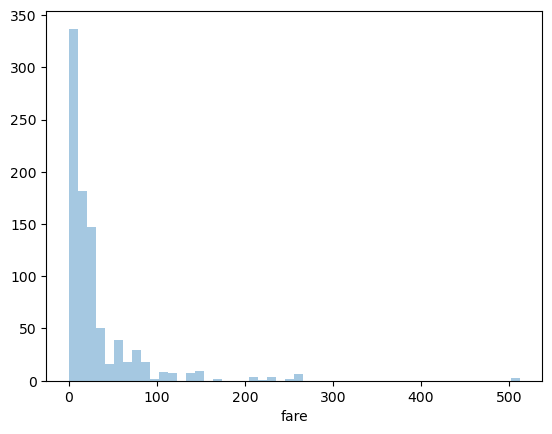

In [68]:
#Distribution Plot  #KDE Kernal Desnsity Estimation
sns.distplot(titanic["fare"],kde=False)

NameError: name 'Swarmplot' is not defined

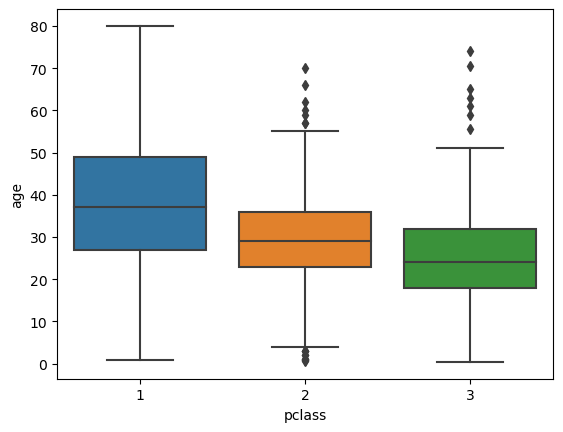

In [73]:
#Box Plot
sns.boxplot(x='pclass',y='age',data=titanic)
Swarmplot
sns.swarmplot(x='pclass',y='age',data=titanic)



In [60]:
# plt.boxplot([df['fare'], df['sibsp'], df['age']])
# plt.title('Boxplot of fare, sibsp, and age')
# plt.show()

In [57]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

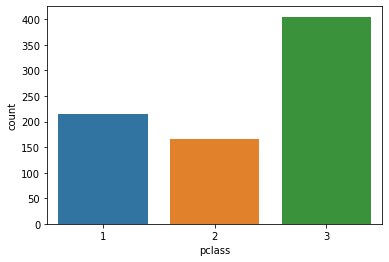

In [62]:
sns.countplot(df.pclass)

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


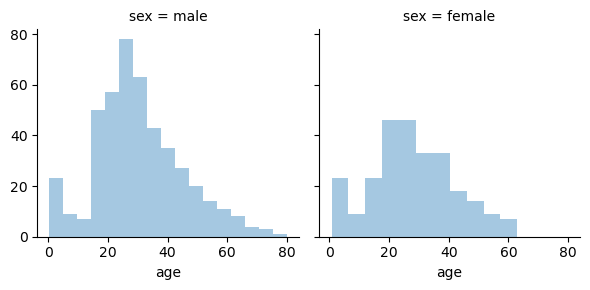

In [75]:
#FacetGrid
g = sns.FacetGrid(data=titanic, col='sex')
g.map(sns.distplot, 'age',kde=False)